# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [35]:
df = pd.read_csv('../data/am_pm.csv')

X = df[['am', 'pm']]
y = df['target']

In [10]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [11]:
def plot_logreg(model, df, feature1, feature2, target):
    '''
    Plot the decision boundary of a logistic regression model.
    The decision boundary separates the two classes in the target column based on the values of feature1 and feature2.
    '''
    b = model.intercept_[0]
    w1, w2 = model.coef_.T

    # Intercept and gradient of the decision boundary
    c = -b / w2
    m = -w1 / w2

    xmin, xmax = df[feature1].min() - 100, df[feature1].max() + 100
    ymin, ymax = df[feature2].min() - 100, df[feature2].max() + 100
    xd = np.array([xmin, xmax])
    yd = m * xd + c

    plt.figure(figsize=(10, 6))
    plt.set_cmap('coolwarm')

    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

    class1 = df[target].value_counts().index[0]
    class2 = df[target].value_counts().index[1]

    plt.scatter(df[df[target] == class1][feature1], df[df[target] == class1][feature2], color='blue', label=class1)
    plt.scatter(df[df[target] == class2][feature1], df[df[target] == class2][feature2], color='orange', label=class2)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(f'Decision Boundary of Logistic Regression\nClass 1: {class1} | Class 2: {class2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

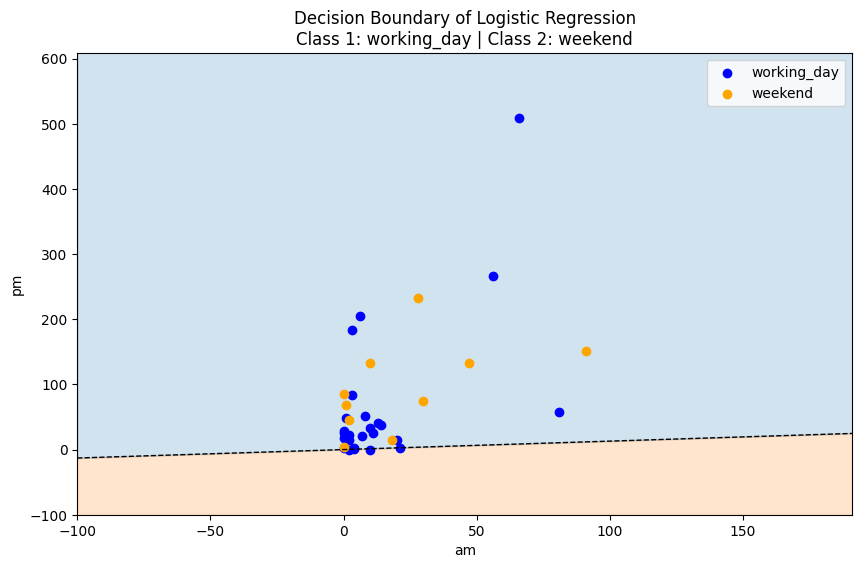

In [12]:
plot_logreg(model, df, 'am', 'pm', 'target')

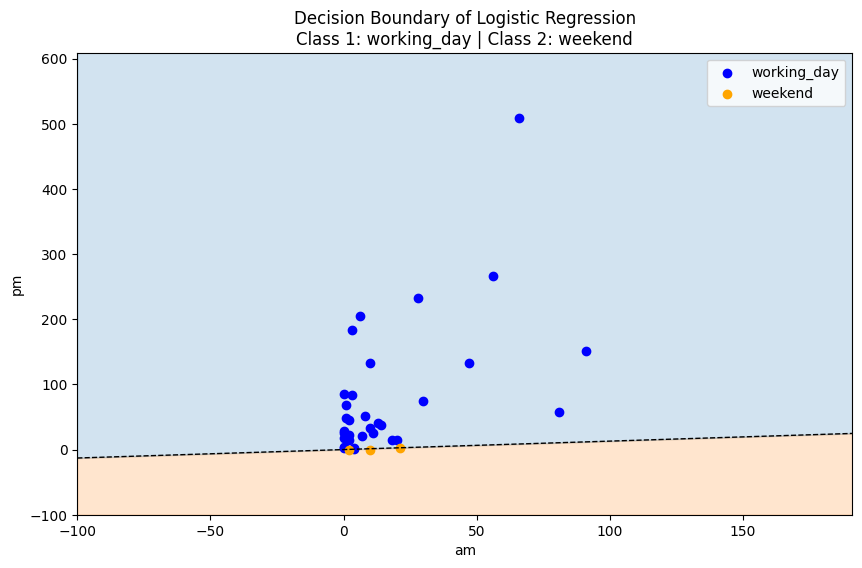

In [13]:
plot_logreg(model, df, 'am', 'pm', 'predict')

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
model_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_scaled.fit(X_scaled, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [16]:
y_pred_scaled = model_scaled.predict(X_scaled)
print(f"Accuracy with scaled features: {accuracy_score(y, y_pred_scaled):.4f}")

Accuracy with scaled features: 0.7429


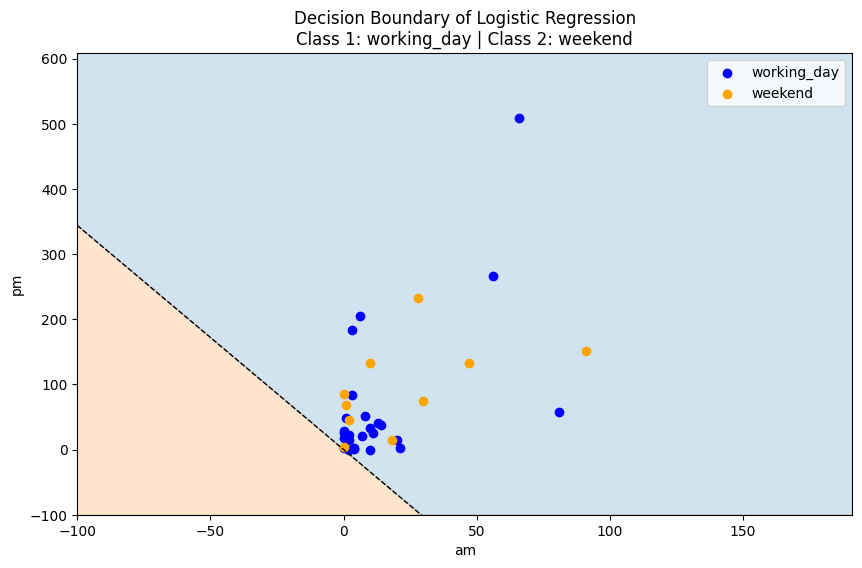

In [17]:
plot_logreg(model_scaled, df, 'am', 'pm', 'target')

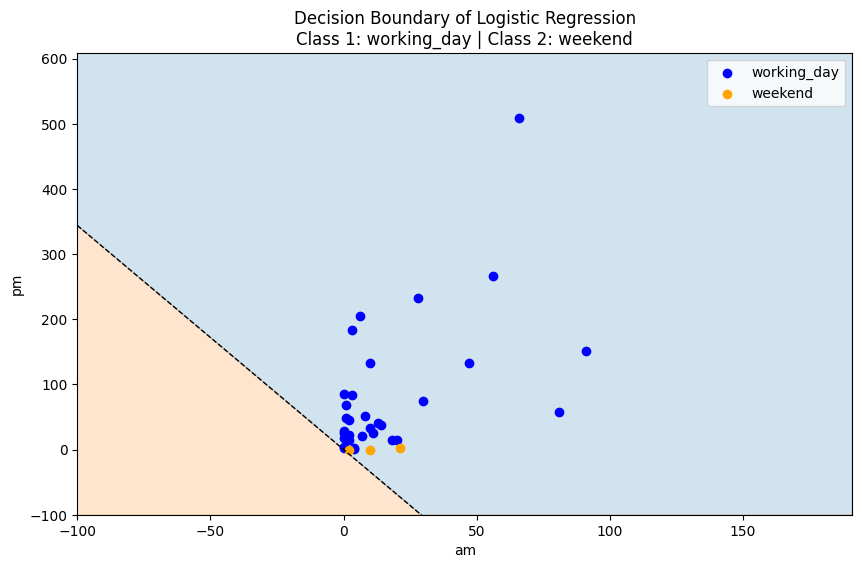

In [18]:
plot_logreg(model_scaled, df, 'am', 'pm', 'predict')

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [51]:
svc_linear = SVC(kernel='linear', probability=True, random_state=21)
svc_linear.fit(X_scaled, y)

accuracy_svc = accuracy_score(y, svc_linear.predict(X_scaled))
print(f"Accuracy SVC with linear kernel: {accuracy_svc:.4f}")

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = ''
for kernel in kernels:
    svc_model = SVC(kernel=kernel, probability=True, random_state=21)
    svc_model.fit(X_scaled, y)
    y_pred = svc_model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f"Best accuracy: {best_accuracy:.4f} with kernel {best_kernel}")

Accuracy SVC with linear kernel: 0.7143
Best accuracy: 0.7429 with kernel poly


In [44]:
def plot_svm_decision_boundary(kernel, X, y):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2, random_state=21, probability=True).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(10, 6))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, label=y, edgecolors="k")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

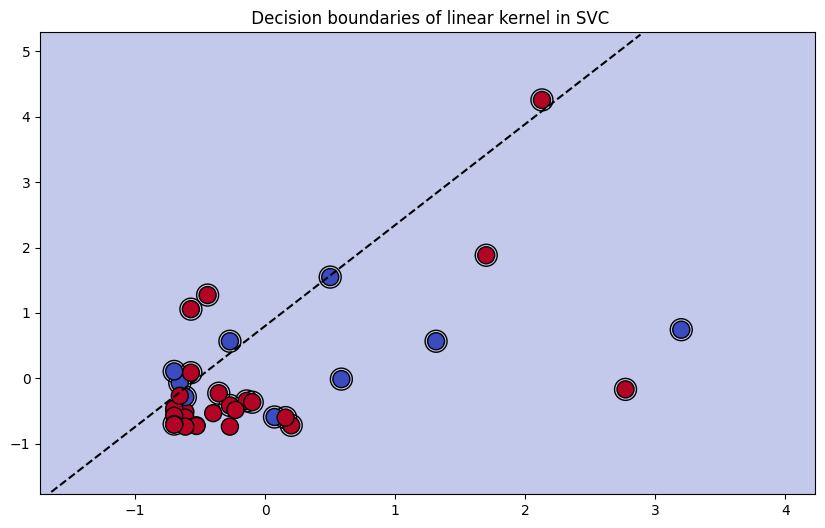

In [45]:
plot_svm_decision_boundary("linear", X_scaled, y.apply(lambda x: 1 if x == 'working_day' else 0).values)

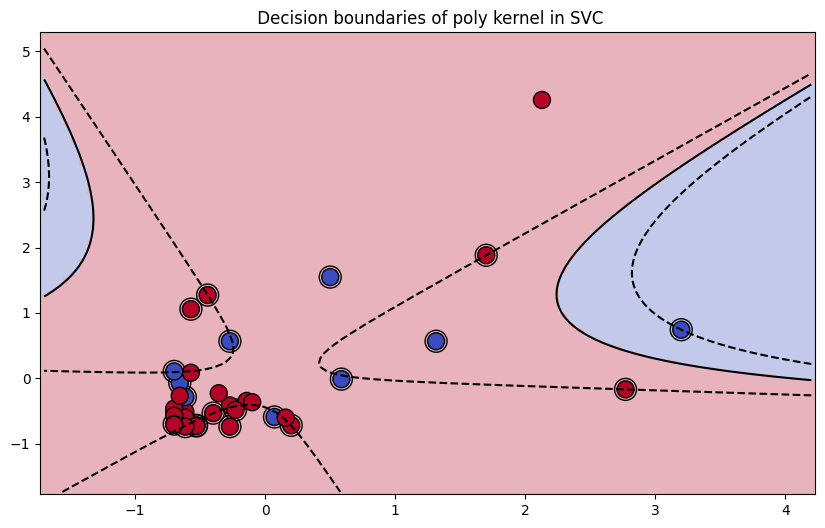

In [46]:
plot_svm_decision_boundary("poly", X_scaled, y.apply(lambda x: 1 if x == 'working_day' else 0).values)

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [54]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_scaled, y)

accuracy_dt = accuracy_score(y, dt.predict(X_scaled))
print(f"Accuracy DecisionTreeClassifier (max_depth=4): {accuracy_dt:.4f}")

best_accuracy = 0
best_depth = 0
for depth in range(1, 11):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_scaled, y)
    y_pred = dt_model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"Best accuracy: {best_accuracy:.4f} with max_depth {best_depth}")

Accuracy DecisionTreeClassifier (max_depth=4): 0.9429
Best accuracy: 1.0000 with max_depth 6


In [69]:
def plot_tree_decision_boundary(max_depth, X, y):
    # Train the tree
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42).fit(X, y)

    # Settings for plotting
    n_classes = 2
    plot_colors = "br"
    _, ax = plt.subplots(figsize=(10, 6))

    # Plot decision boundary
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        ax=ax,
    )

    # Plot the points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            edgecolor="black",
            s=15,
        )

    _ = plt.show()

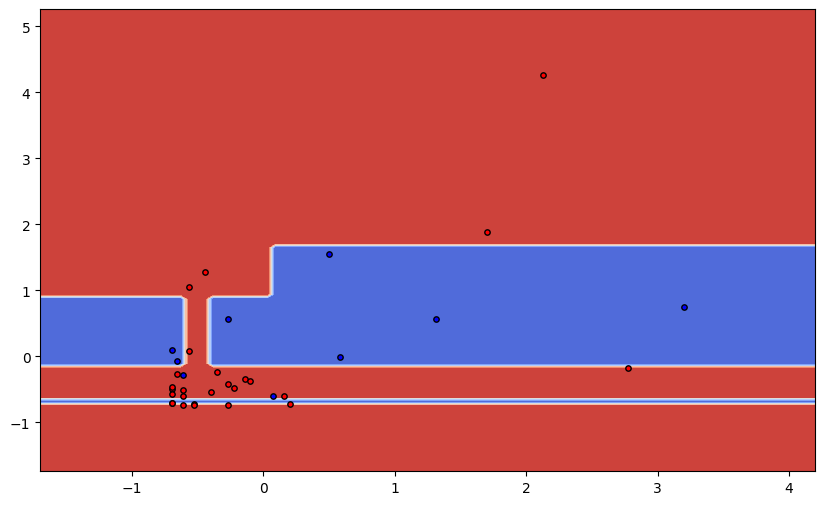

In [70]:
plot_tree_decision_boundary(4, X_scaled, y.apply(lambda x: 1 if x == 'working_day' else 0).values)

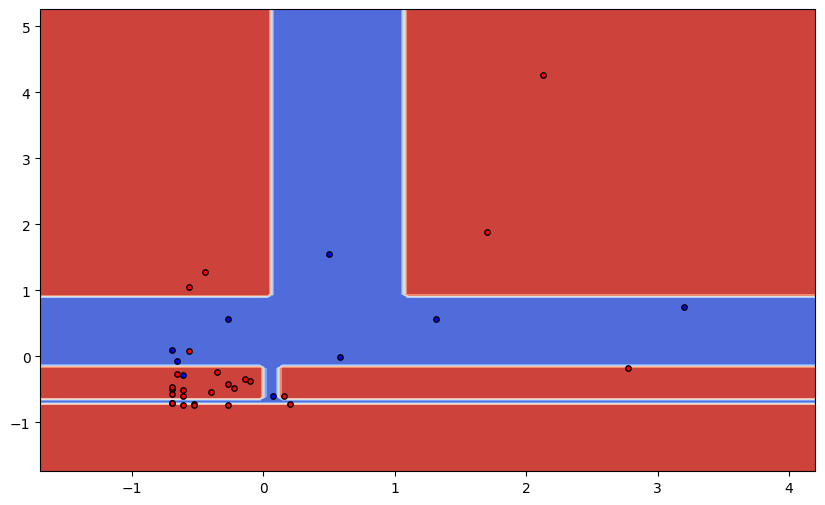

In [71]:
plot_tree_decision_boundary(6, X_scaled, y.apply(lambda x: 1 if x == 'working_day' else 0).values)

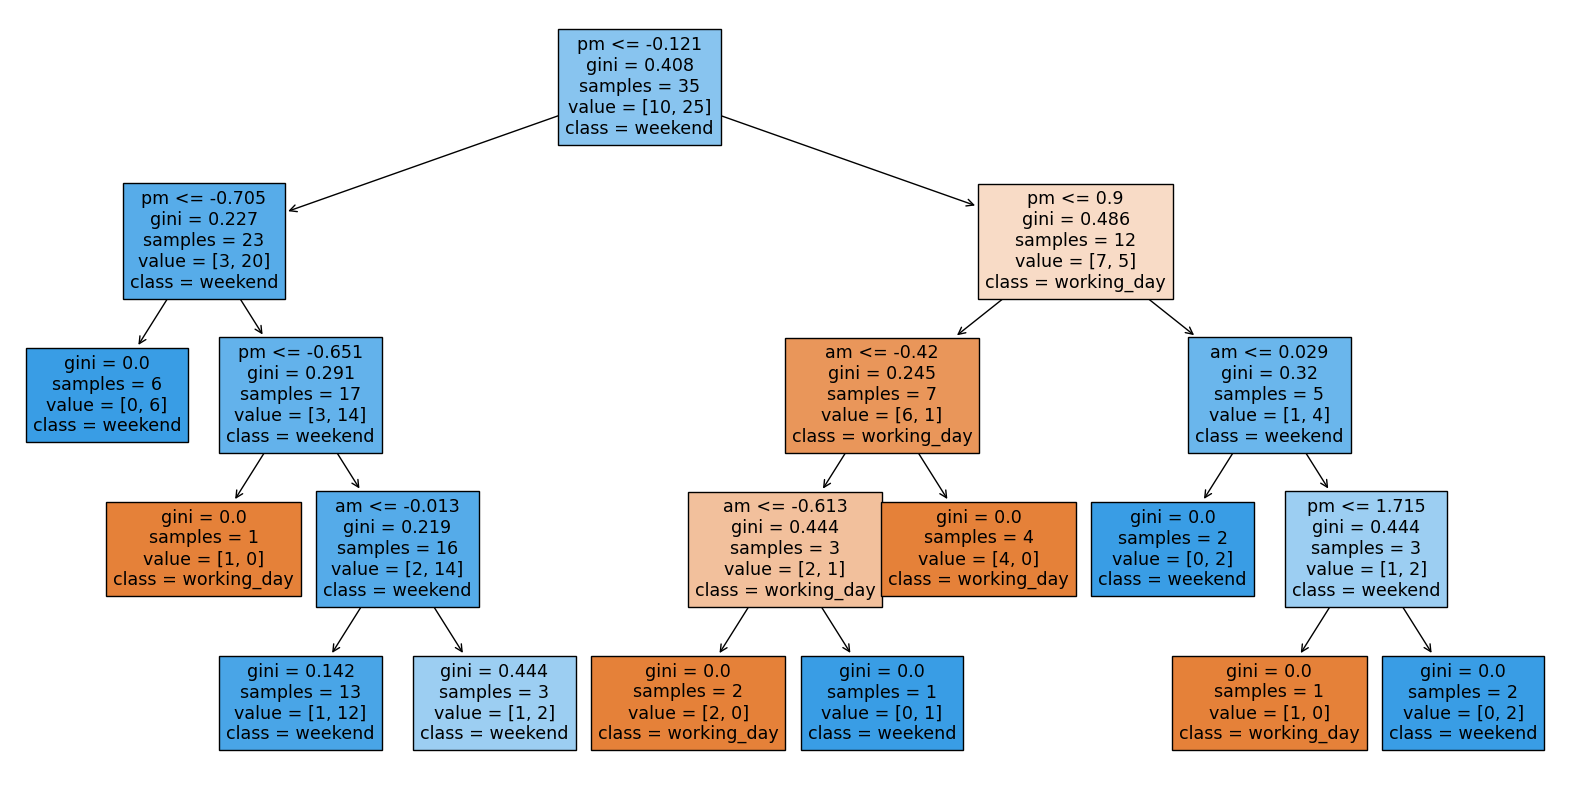

In [55]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=['am', 'pm'], class_names=['working_day', 'weekend'], filled=True)
plt.show()

## 7 leaves labeled as working in tree